# Analysis of Electoral College Effect By Demographic

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline

### Load "Voter Power Index"

In [2]:
voter_power = (
    pd
    .read_csv(
        "../data/fivethirtyeight/presidential_state_toplines_2020.csv", 
        parse_dates=["modeldate"]
    )
    .sort_values(
        "modeldate", 
        ascending=False
    )
    .drop_duplicates(subset="state") # the 538 data includes every daily model run, we want the most recent
    .assign(state = lambda x: x["state"].str.upper())
)

In [3]:
voter_power.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,state,tipping,vpi,...,margin_lo,win_EC_if_win_state_inc,win_EC_if_win_state_chal,win_state_if_win_EC_inc,win_state_if_win_EC_chal,state_turnout,state_turnout_hi,state_turnout_lo,timestamp,simulations
0,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,WYOMING,0.000000,0.000000,...,27.835530,0.113316,1.000000,1.000000,0.001162,272951.0,317867.0,229434.5,09:29:03 28 Oct 2020,40000
29,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,MISSISSIPPI,0.001737,0.202366,...,0.404062,0.121837,0.969705,0.975044,0.103380,1318458.0,1494576.0,1146453.0,09:29:03 28 Oct 2020,40000
31,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,MICHIGAN,0.084937,2.399994,...,-14.636010,0.839949,0.928013,0.439267,0.989404,5485012.0,6186714.0,4791720.0,09:29:03 28 Oct 2020,40000
32,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,MASSACHUSETTS,0.000200,0.008166,...,-44.593410,0.350000,0.882541,0.001546,0.999632,3643155.0,4141299.0,3155681.0,09:29:03 28 Oct 2020,40000
33,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,MARYLAND,0.000212,0.011051,...,-38.003120,0.250000,0.882505,0.001325,0.999490,3088225.0,3515967.0,2668539.0,09:29:03 28 Oct 2020,40000


In [4]:
voter_power.sort_values("vpi", ascending=False)

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,state,tipping,vpi,...,margin_lo,win_EC_if_win_state_inc,win_EC_if_win_state_chal,win_state_if_win_EC_inc,win_state_if_win_EC_chal,state_turnout,state_turnout_hi,state_turnout_lo,timestamp,simulations
12,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,PENNSYLVANIA,0.382925,8.702174,...,-11.534680,0.679778,0.980105,0.866387,0.950449,6823594.0,7708582.0,5950714.0,09:29:03 28 Oct 2020,40000
25,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,NE-2,0.010887,5.171942,...,-12.168550,0.378251,0.966370,0.780477,0.839335,326079.9,368112.0,284935.0,09:29:03 28 Oct 2020,40000
1,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,WISCONSIN,0.067087,3.132759,...,-14.950900,0.808495,0.932420,0.470848,0.986996,3315459.0,3740623.0,2895734.0,09:29:03 28 Oct 2020,40000
22,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,NEVADA,0.026812,3.068934,...,-14.314770,0.602470,0.936308,0.527827,0.955832,1351075.0,1524489.0,1179982.0,09:29:03 28 Oct 2020,40000
53,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,ARIZONA,0.059812,2.989759,...,-10.157180,0.291284,0.975323,0.876104,0.728957,3099141.0,3498251.0,2702987.0,09:29:03 28 Oct 2020,40000
31,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,MICHIGAN,0.084937,2.399994,...,-14.636010,0.839949,0.928013,0.439267,0.989404,5485012.0,6186714.0,4791720.0,09:29:03 28 Oct 2020,40000
21,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,NEW HAMPSHIRE,0.012863,2.366268,...,-21.475480,0.438367,0.928598,0.481449,0.921495,840076.6,948053.5,734223.5,09:29:03 28 Oct 2020,40000
30,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,MINNESOTA,0.045175,2.107355,...,-15.452570,0.712615,0.920943,0.376767,0.981188,3328424.0,3755399.0,2904647.0,09:29:03 28 Oct 2020,40000
19,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,NEW MEXICO,0.012200,2.083771,...,-21.094590,0.611362,0.896763,0.149735,0.988073,907061.1,1025783.0,791622.5,09:29:03 28 Oct 2020,40000
35,2020,President,polls-plus,2020-10-28,Trump,Biden,NaN,ME-2,0.004400,1.745260,...,-13.677800,0.210484,0.968626,0.863737,0.587784,390824.2,442042.5,340794.5,09:29:03 28 Oct 2020,40000


In [5]:
len(voter_power)

56

In [6]:
voter_power["state"].unique()

array(['WYOMING', 'MISSISSIPPI', 'MICHIGAN', 'MASSACHUSETTS', 'MARYLAND',
       'MAINE', 'ME-2', 'ME-1', 'LOUISIANA', 'KENTUCKY', 'KANSAS', 'IOWA',
       'INDIANA', 'IDAHO', 'HAWAII', 'GEORGIA', 'FLORIDA',
       'DISTRICT OF COLUMBIA', 'DELAWARE', 'CONNECTICUT', 'COLORADO',
       'CALIFORNIA', 'ARKANSAS', 'ARIZONA', 'ALASKA', 'ALABAMA',
       'WISCONSIN', 'MINNESOTA', 'ILLINOIS', 'MISSOURI', 'OKLAHOMA',
       'MONTANA', 'WASHINGTON', 'VIRGINIA', 'VERMONT', 'UTAH', 'TEXAS',
       'TENNESSEE', 'SOUTH DAKOTA', 'SOUTH CAROLINA', 'RHODE ISLAND',
       'PENNSYLVANIA', 'OREGON', 'WEST VIRGINIA', 'OHIO', 'NEW HAMPSHIRE',
       'NE-2', 'NE-3', 'NEBRASKA', 'NEVADA', 'NE-1', 'NEW JERSEY',
       'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'NEW MEXICO'],
      dtype=object)

### Load state registered voter counts, by demographic

In [7]:
cols = [
    "state", "demographic", "total_pop", "total_citizen_pop", 
    "total_registered", "pct_registered", "moe_registered",
    "pct_registered_citizen", "moe_registered_citizen", "total_voted",
    "pct_voted_total", "moe_pct_voted", "pct_voted_citizen", 
    "moe_pct_voted_citizen", "extra"
]

In [8]:
demo_by_state = (
    pd
    .read_excel(
        "../data/census/table04b.xlsx", 
        skiprows=4, 
        names=cols,
        na_values=["-"]
    )
    .assign(state = lambda x: x["state"].fillna(method="ffill"))
    .assign(total_registered = lambda x: x["total_registered"].fillna(0))
    .drop("extra", axis=1)
)

In [9]:
demo_by_state.head(10)

,state,demographic,total_pop,total_citizen_pop,total_registered,pct_registered,moe_registered,pct_registered_citizen,moe_registered_citizen,total_voted,pct_voted_total,moe_pct_voted,pct_voted_citizen,moe_pct_voted_citizen
0,US,Total,245502.0,224059.0,157596.0,64.2,0.3,70.3,0.3,137537.0,56,0.3,61.4,0.3
1,US,Male,118488.0,107554.0,73761.0,62.3,0.4,68.6,0.4,63801.0,53.8,0.4,59.3,0.5
2,US,Female,127013.0,116505.0,83835.0,66,0.4,72,0.4,73735.0,58.1,0.4,63.3,0.4
3,US,White alone,192129.0,177865.0,127463.0,66.3,0.3,71.7,0.3,111891.0,58.2,0.3,62.9,0.4
4,US,White non-Hispanic alone,157395.0,154450.0,114151.0,72.5,0.3,73.9,0.3,100849.0,64.1,0.4,65.3,0.4
5,US,Black alone,30608.0,28808.0,19984.0,65.3,1,69.4,1,17119.0,55.9,1.1,59.4,1.1
6,US,Asian alone,14881.0,10283.0,5785.0,38.9,1.6,56.3,1.9,5043.0,33.9,1.5,49,1.9
7,US,Hispanic (of any race),38990.0,26662.0,15267.0,39.2,1.2,57.3,1.5,12682.0,32.5,1.1,47.6,1.5
8,US,White alone or in combination,195716.0,181268.0,129664.0,66.3,0.3,71.5,0.3,113707.0,58.1,0.3,62.7,0.3
9,US,Black alone or in combination,32211.0,30326.0,20935.0,65,1,69,1,17875.0,55.5,1,58.9,1.1


In [10]:
main_demographics = [
    "Total",
    "White alone",
    "Black alone",
    "Asian alone",
    "Hispanic (of any race)",
    "White non-Hispanic alone",
    "Male",
    "Female"
]

### Account for Maine and Nebraska

Maine and Nebraska assign delegates to the Electoral College based on congressional districts. This matters when talking about voter power in the 2020 Presidential Election because Maine's 2nd congressional district and Nebraska's 2nd congressional district could be potential tipping points, so we're going to estimate their registered voter counts using citizen voting-age population by race from the 2019 American Community Survey as a guideline. (This data is not available through the ACS for 2016.)

In [11]:
# Just showing outsized importance of NE-2 and ME-2
voter_power.loc[
    lambda x: x["state"].isin(["MAINE", "ME-1", "ME-2", "NEBRASKA", "NE-1", "NE-2", "NE-3"])
][["cycle", "branch", "model", "state", "vpi"]].sort_values("vpi", ascending=False)

,cycle,branch,model,state,vpi
25,2020,President,polls-plus,NE-2,5.171942
35,2020,President,polls-plus,ME-2,1.745260
34,2020,President,polls-plus,MAINE,0.988714
36,2020,President,polls-plus,ME-1,0.126397
26,2020,President,polls-plus,NE-1,0.055132
23,2020,President,polls-plus,NEBRASKA,0.002330
24,2020,President,polls-plus,NE-3,0.000000


In [12]:
CD_EST_COLS = {
    "Geographic Area Name": "name", 
    "Estimate!!Total!!Citizens 18 years and over": "Total", 
    "Estimate!!Total!!Citizens 18 years and over!!RACE AND HISPANIC ORIGIN!!White alone": "White alone",
    "Estimate!!Total!!Citizens 18 years and over!!RACE AND HISPANIC ORIGIN!!Black or African American alone": "Black alone",
    "Estimate!!Total!!Citizens 18 years and over!!RACE AND HISPANIC ORIGIN!!Asian alone": "Asian alone",
    "Estimate!!Total!!Citizens 18 years and over!!RACE AND HISPANIC ORIGIN!!Hispanic or Latino": "Hispanic (of any race)",
    "Estimate!!Total!!Citizens 18 years and over!!RACE AND HISPANIC ORIGIN!!White alone, Not Hispanic or Latino": "White non-Hispanic alone",
    "Estimate!!Total!!Citizens 18 years and over!!SEX!!Male": "Male",
    "Estimate!!Total!!Citizens 18 years and over!!SEX!!Female": "Female"
}

In [13]:
cd_citizen_voting_age = (
    pd
    .read_csv(
        "../data/census/2019-acs-citizen-voting-age-characteristics-maine-nebraska.csv",
        skiprows=1
    )
    [["id"] + list(CD_EST_COLS.keys())]
    .rename(columns=CD_EST_COLS)
    .assign(
        district = lambda df: df["name"].replace({
            "Congressional District 1 (116th Congress), Maine": "ME-1",
            "Congressional District 2 (116th Congress), Maine": "ME-2",
            "Congressional District 1 (116th Congress), Nebraska": "NE-1",
            "Congressional District 2 (116th Congress), Nebraska": "NE-2",
            "Congressional District 3 (116th Congress), Nebraska": "NE-3",
        }),
        state = lambda df: df["name"].apply(lambda x: x.split(", ")[-1].upper())
    )
)

cd_citizen_voting_age

,id,name,Total,White alone,Black alone,Asian alone,Hispanic (of any race),White non-Hispanic alone,Male,Female,district,state
0,5001600US2301,"Congressional District 1 (116th Congress), Maine",550561,526183,5826,6432,8290,520670,264141,286420,ME-1,MAINE
1,5001600US2302,"Congressional District 2 (116th Congress), Maine",528209,505554,3774,2937,6522,501213,257903,270306,ME-2,MAINE
2,5001600US3101,"Congressional District 1 (116th Congress), Neb...",475365,433715,12359,8902,29073,413103,235513,239852,NE-1,NEBRASKA
3,5001600US3102,"Congressional District 2 (116th Congress), Neb...",472694,401731,40421,11719,30432,378947,229615,243079,NE-2,NEBRASKA
4,5001600US3103,"Congressional District 3 (116th Congress), Neb...",440891,412277,4361,2250,33126,392866,218411,222480,NE-3,NEBRASKA


Calculate ratio between voting-age citizens and registered voters, for each state:

In [14]:
cd_registered_citizen_factors = (
    cd_citizen_voting_age
    .groupby("state")
    ["Total"]
    .sum()
    .to_frame("cva")
    .reset_index()
    .merge(
        demo_by_state
        .loc[lambda df: df["demographic"] == "Total"]
        [[
            "state",
            "total_registered",
        ]],
        how = "left",
        on = "state",
    )
    .assign(
        registered_citizen_factor = lambda df: df["cva"] / (df["total_registered"] * 1000)
    )
)

cd_registered_citizen_factors

,state,cva,total_registered,registered_citizen_factor
0,MAINE,1078770,830.0,1.299723
1,NEBRASKA,1388950,1008.0,1.377927


In [15]:
cd_total_registered_ests = (
    cd_citizen_voting_age
    .merge(
        cd_registered_citizen_factors,
        how = "left",
        on = "state",
    )
    .melt(
        id_vars = [ "district", "registered_citizen_factor" ],
        value_vars = main_demographics,
    )
    .rename(columns = {
        "district": "state",
        "variable": "demographic",
    })
    .assign(
        total_registered = lambda df: ((df["value"] / 1000) / df["registered_citizen_factor"]).round(3)
    )
    .drop(columns = [ "registered_citizen_factor", "value" ])
)

cd_total_registered_ests

,state,demographic,total_registered
0,ME-1,Total,423.599
1,ME-2,Total,406.401
2,NE-1,Total,344.986
3,NE-2,Total,343.047
4,NE-3,Total,319.967
5,ME-1,White alone,404.842
6,ME-2,White alone,388.971
7,NE-1,White alone,314.759
8,NE-2,White alone,291.547
9,NE-3,White alone,299.201


### Join the data

In [16]:
joined = (
    pd
    .merge(
        pd.concat([
            demo_by_state.loc[lambda x: x["demographic"].isin(main_demographics)],
            cd_total_registered_ests
        ]),
        voter_power[["state", "vpi"]],
        on="state",
        how="left"
    )
    .dropna(subset=["vpi"])
    .assign(demo_power = lambda x: x["total_registered"] * x["vpi"])
)

In [17]:
joined.sample(5)

,state,demographic,total_pop,total_citizen_pop,total_registered,pct_registered,moe_registered,pct_registered_citizen,moe_registered_citizen,total_voted,pct_voted_total,moe_pct_voted,pct_voted_citizen,moe_pct_voted_citizen,vpi,demo_power
269,NEW YORK,Black alone,2610.0,2321.0,1570.0,60.2,3.9,67.6,3.9,1350.0,51.7,4,58.2,4.2,0.001396,2.191249
414,WYOMING,Asian alone,6.0,4.0,3.0,B,B,B,B,3.0,B,B,B,B,0.000000,0.000000
404,WISCONSIN,White non-Hispanic alone,3792.0,3776.0,3009.0,79.4,2.2,79.7,2.2,2796.0,73.7,2.4,74,2.4,3.132759,9426.471831
32,ARKANSAS,Total,2216.0,2116.0,1456.0,65.7,2.7,68.8,2.6,1241.0,56,2.8,58.7,2.8,0.012276,17.873274
180,MASSACHUSETTS,White non-Hispanic alone,4083.0,3969.0,3078.0,75.4,2.2,77.5,2.2,2789.0,68.3,2.4,70.3,2.4,0.008166,25.134640


In [18]:
len(joined)

448

### Analyze the data

Find the aggregate amount of voting power and total number of registered voters for each demographic.

In [19]:
demo_power = (
    joined
    .groupby("demographic")
    .pipe(lambda grp: pd.DataFrame({
        "total_power": grp["demo_power"].sum(),
        "total_registered": grp["total_registered"].sum(),
    }))
    .assign(
        # The "power ratio" is the total power for a demographic divided by the number of registered voters
        power_ratio = lambda df: df["total_power"] / df["total_registered"],
        
        # Set all of the power ratios in line with the overall power ratio 
        power_ratio_norm = lambda df: df["power_ratio"] / df.loc["Total"]["power_ratio"],
    )
)

demo_power

,total_power,total_registered,power_ratio,power_ratio_norm
demographic,,,,
Asian alone,3326.478071,5806.807,0.572858,0.596854
Black alone,16694.765409,20034.855,0.833286,0.868191
Female,81652.883466,84772.278,0.963203,1.003550
Hispanic (of any race),11235.429847,15343.620,0.732254,0.762927
Male,71358.857722,74659.721,0.955788,0.995824
Total,153024.085862,159434.000,0.959796,1.000000
White alone,129591.522828,129163.320,1.003315,1.045342
White non-Hispanic alone,119768.154063,115799.158,1.034275,1.077599


In [20]:
gender = ["Male", "Female"]
non_race = ["Male", "Female", "Total"]

In [21]:
demo_power.loc[gender][["power_ratio_norm"]].round(2)

,power_ratio_norm
demographic,
Male,1.0
Female,1.0


In [22]:
demo_power[
    ~demo_power.index.isin(non_race)
][["power_ratio_norm"]].round(2)

,power_ratio_norm
demographic,
Asian alone,0.60
Black alone,0.87
Hispanic (of any race),0.76
White alone,1.05
White non-Hispanic alone,1.08


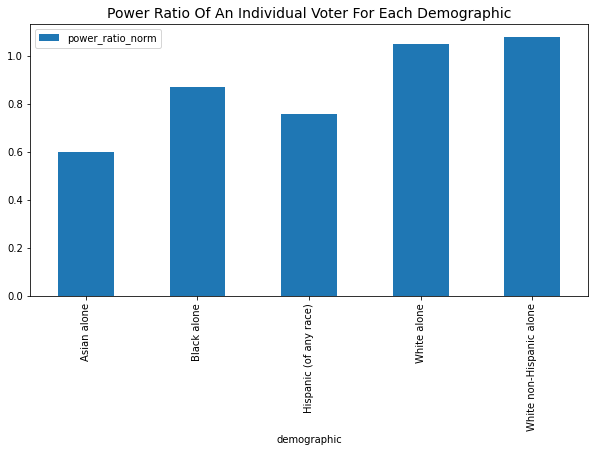

In [23]:
ax = demo_power[
    ~demo_power.index.isin(non_race)
][["power_ratio_norm"]].round(2).plot(kind="bar", figsize=(10,5))
ax.set_title("Power Ratio Of An Individual Voter For Each Demographic", size=14)
pass

### Calculate state-level effects for demographics

In [24]:
def calculate_state_effects(demo):
    state_level = joined.loc[lambda df: df["demographic"] == demo]
    overall = demo_power.loc[demo]["power_ratio"]
    return (
        state_level
        [[
            "state",
            "demographic",
            "total_registered",
            "vpi"
        ]]
        .assign(
            effect = lambda df: (
                (df["vpi"] - overall) * df["total_registered"] 
                / df["total_registered"].sum()
            ).round(3)
        )
        .sort_values("effect")
        .set_index("state")
    )

Asian:

In [25]:
(
    calculate_state_effects("Asian alone")
    .loc[lambda df: df["effect"].abs() > 0.01]
)

,demographic,total_registered,vpi,effect
state,,,,
CALIFORNIA,Asian alone,2080.0,0.024355,-0.196
NEW YORK,Asian alone,430.0,0.001396,-0.042
TEXAS,Asian alone,418.0,0.221596,-0.025
ILLINOIS,Asian alone,231.0,0.017822,-0.022
WASHINGTON,Asian alone,190.0,0.092134,-0.016
HAWAII,Asian alone,206.0,0.152966,-0.015
NEW JERSEY,Asian alone,220.0,0.195730,-0.014
MARYLAND,Asian alone,147.0,0.011051,-0.014
MASSACHUSETTS,Asian alone,128.0,0.008166,-0.012


Hispanic:

In [26]:
(
    calculate_state_effects("Hispanic (of any race)")
    .loc[lambda df: df["effect"].abs() > 0.01]
)

,demographic,total_registered,vpi,effect
state,,,,
CALIFORNIA,Hispanic (of any race),3882.0,0.024355,-0.179
TEXAS,Hispanic (of any race),2654.0,0.221596,-0.088
NEW YORK,Hispanic (of any race),1044.0,0.001396,-0.050
ILLINOIS,Hispanic (of any race),634.0,0.017822,-0.030
NEW JERSEY,Hispanic (of any race),486.0,0.195730,-0.017
WASHINGTON,Hispanic (of any race),292.0,0.092134,-0.012
MICHIGAN,Hispanic (of any race),101.0,2.399994,0.011
NORTH CAROLINA,Hispanic (of any race),208.0,1.554517,0.011
WISCONSIN,Hispanic (of any race),136.0,3.132759,0.021


Black:

In [27]:
(
    calculate_state_effects("Black alone")
    .loc[lambda df: df["effect"].abs() > 0.01]
)

,demographic,total_registered,vpi,effect
state,,,,
NEW YORK,Black alone,1570.0,0.001396,-0.065
TEXAS,Black alone,1724.0,0.221596,-0.053
CALIFORNIA,Black alone,1018.0,0.024355,-0.041
MARYLAND,Black alone,954.0,0.011051,-0.039
ILLINOIS,Black alone,932.0,0.017822,-0.038
LOUISIANA,Black alone,755.0,0.062775,-0.029
ALABAMA,Black alone,694.0,0.018089,-0.028
SOUTH CAROLINA,Black alone,720.0,0.067542,-0.028
TENNESSEE,Black alone,519.0,0.036686,-0.021


White non-Hispanic:

In [28]:
(
    calculate_state_effects("White non-Hispanic alone")
    .loc[lambda df: df["effect"].abs() > 0.01]
)

,demographic,total_registered,vpi,effect
state,,,,
CALIFORNIA,White non-Hispanic alone,8732.0,0.024355,-0.076
NEW YORK,White non-Hispanic alone,6264.0,0.001396,-0.056
TEXAS,White non-Hispanic alone,6822.0,0.221596,-0.048
ILLINOIS,White non-Hispanic alone,4839.0,0.017822,-0.042
OHIO,White non-Hispanic alone,5121.0,0.357439,-0.030
MASSACHUSETTS,White non-Hispanic alone,3078.0,0.008166,-0.027
WASHINGTON,White non-Hispanic alone,3164.0,0.092134,-0.026
INDIANA,White non-Hispanic alone,2832.0,0.019664,-0.025
MISSOURI,White non-Hispanic alone,2832.0,0.022534,-0.025


## Proportion registered voters who are white non-Hispanic vs. VPI

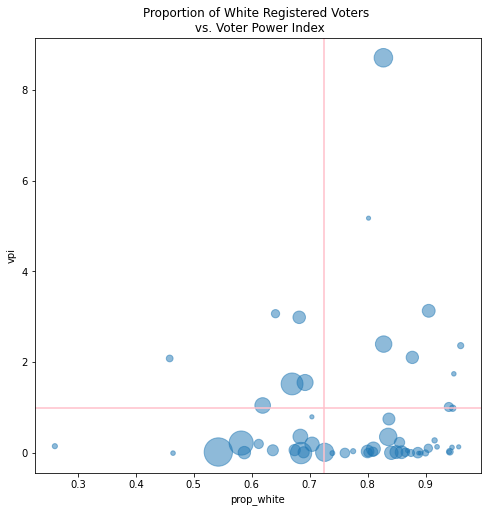

In [29]:
graph_data = (
    joined
    .set_index([ "state", "demographic" ])
    ["total_registered"]
    .unstack()
    .assign(prop_white = lambda df: df["White non-Hispanic alone"] / df["Total"])
    [[
        "Total",
        "prop_white",
    ]]
    .rename(columns = { "Total": "total_registered" })
    .reset_index()
    .merge(
        voter_power
        [[ "state", "vpi" ]],
        how = "left",
        on = "state"
    )
    .assign(
        s = lambda df: df["total_registered"] / 20,
        state_name = lambda df: df["state"].apply(
            lambda s: s.title() if s not in ["ME-1", "ME-2", "NE-1", "NE-2", "NE-3"] else s
        ),
        pct_white = lambda df: df["prop_white"] * 100
    )
)

graph_data.to_csv("../outputs/white_non_hispanic.csv", index=False)

(
    graph_data
    .plot(
        kind="scatter",
        y = "vpi",
        x = "prop_white",
        s = "s",
        alpha = 0.5,
        figsize = (8, 8),
        title = "Proportion of White Registered Voters \n vs. Voter Power Index"
    )
)
mpl.pyplot.axvline(0.724, color = "pink")
mpl.pyplot.axhline(1, color = "pink")
pass

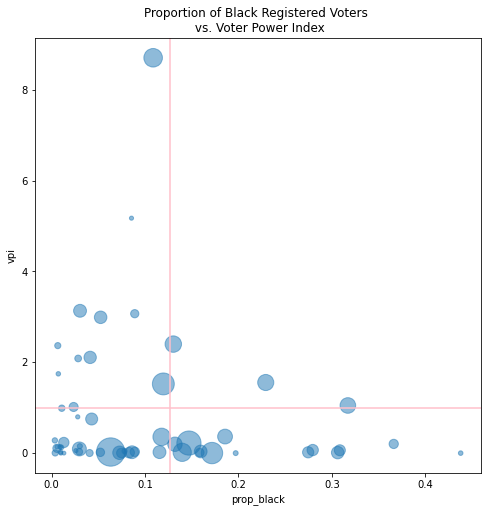

In [30]:
graph_data = (
    joined
    .set_index([ "state", "demographic" ])
    ["total_registered"]
    .unstack()
    .assign(prop_black = lambda df: df["Black alone"] / df["Total"])
    [[
        "Total",
        "prop_black",
    ]]
    .rename(columns = { "Total": "total_registered" })
    .reset_index()
    .merge(
        voter_power
        [[ "state", "vpi" ]],
        how = "left",
        on = "state"
    )
    .assign(
        s = lambda df: df["total_registered"] / 20,
        state_name = lambda df: df["state"].apply(
            lambda s: s.title() if s not in ["ME-1", "ME-2", "NE-1", "NE-2", "NE-3"] else s
        ),
        pct_black = lambda df: df["prop_black"] * 100
    )
)

graph_data.to_csv("../outputs/black.csv", index=False)

(
    graph_data
    .plot(
        kind="scatter",
        y = "vpi",
        x = "prop_black",
        s = "s",
        alpha = 0.5,
        figsize = (8, 8),
        title = "Proportion of Black Registered Voters \n vs. Voter Power Index"
    )
)
mpl.pyplot.axvline(0.127, color = "pink")
mpl.pyplot.axhline(1, color = "pink")
pass

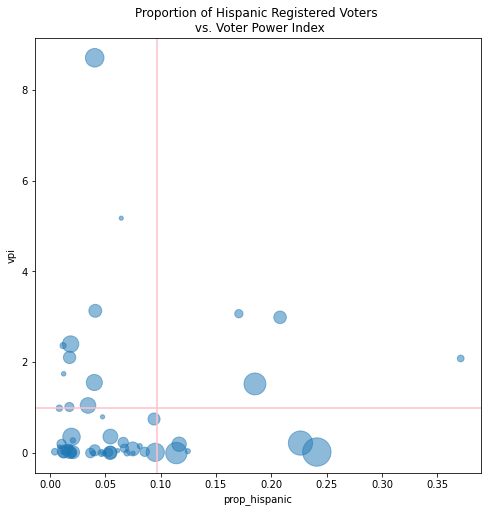

In [31]:
graph_data = (
    joined
    .set_index([ "state", "demographic" ])
    ["total_registered"]
    .unstack()
    .assign(prop_hispanic = lambda df: df["Hispanic (of any race)"] / df["Total"])
    [[
        "Total",
        "prop_hispanic",
    ]]
    .rename(columns = { "Total": "total_registered" })
    .reset_index()
    .merge(
        voter_power
        [[ "state", "vpi" ]],
        how = "left",
        on = "state"
    )
    .assign(
        s = lambda df: df["total_registered"] / 20,
        state_name = lambda df: df["state"].apply(
            lambda s: s.title() if s not in ["ME-1", "ME-2", "NE-1", "NE-2", "NE-3"] else s
        ),
        pct_hispanic = lambda df: df["prop_hispanic"] * 100
    )
)

graph_data.to_csv("../outputs/hispanic.csv", index=False)

(
    graph_data
    .plot(
        kind="scatter",
        y = "vpi",
        x = "prop_hispanic",
        s = "s",
        alpha = 0.5,
        figsize = (8, 8),
        title = "Proportion of Hispanic Registered Voters \n vs. Voter Power Index"
    )
)
mpl.pyplot.axvline(0.097, color = "pink")
mpl.pyplot.axhline(1, color = "pink")
pass

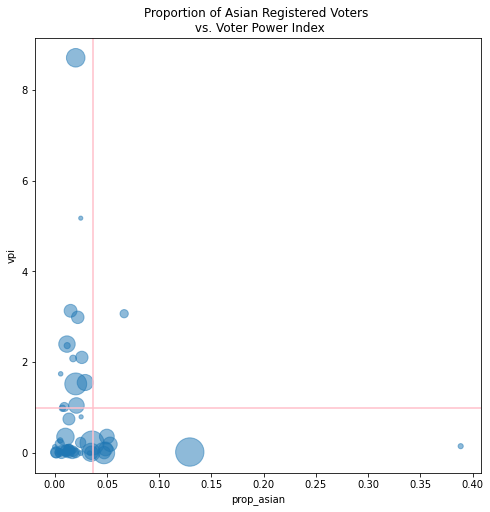

In [32]:
graph_data = (
    joined
    .set_index([ "state", "demographic" ])
    ["total_registered"]
    .unstack()
    .assign(prop_asian = lambda df: df["Asian alone"] / df["Total"])
    [[
        "Total",
        "prop_asian",
    ]]
    .rename(columns = { "Total": "total_registered" })
    .reset_index()
    .merge(
        voter_power
        [[ "state", "vpi" ]],
        how = "left",
        on = "state"
    )
    .assign(
        s = lambda df: df["total_registered"] / 20,
        state_name = lambda df: df["state"].apply(
            lambda s: s.title() if s not in ["ME-1", "ME-2", "NE-1", "NE-2", "NE-3"] else s
        ),
        pct_asian = lambda df: df["prop_asian"] * 100
    )
)

graph_data.to_csv("../outputs/asian.csv", index=False)

(
    graph_data
    .plot(
        kind="scatter",
        y = "vpi",
        x = "prop_asian",
        s = "s",
        alpha = 0.5,
        figsize = (8, 8),
        title = "Proportion of Asian Registered Voters \n vs. Voter Power Index"
    )
)
mpl.pyplot.axvline(0.037, color = "pink")
mpl.pyplot.axhline(1, color = "pink")
pass

---

---

---